In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o dataset
df = pd.read_csv('clean_dataset_final/art_prices_clean.csv')

In [11]:
display(df.head())

,index,price,yearCreation,is_numbered,condition_score,movement_clean
0,0,28500,2021,0,3,Other
1,1,3000,1925,0,1,Surrealism
2,2,5000,2016,0,3,Abstract
3,3,5000,2010,0,3,Abstract
4,4,2500,2001,0,3,Abstract


In [12]:
# Variáveis selecionadas
features = ['yearCreation', 'is_numbered', 'condition_score']
X = df[features]
y = df['price']

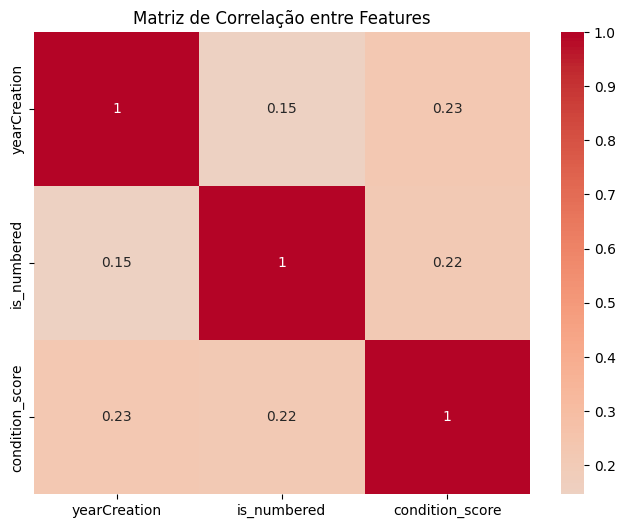


Fator de Inflação de Variância (VIF):
           feature       VIF
0     yearCreation  8.862931
1      is_numbered  1.257456
2  condition_score  9.255917


In [13]:
# Matriz de correlação
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Features')
plt.show()

# Fator de Inflação de Variância (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nFator de Inflação de Variância (VIF):")
print(vif_data)

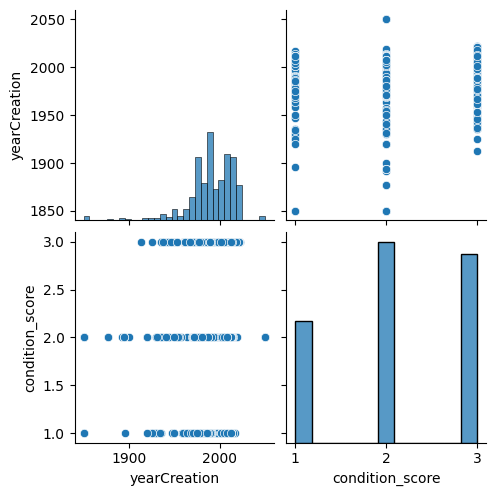

In [14]:
sns.pairplot(df[['yearCreation', 'condition_score']])
plt.show()

In [16]:
# Divisão de dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
# Modelagem com Statsmodels (para análise detalhada)

# Adicionar constante para o intercept
X_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_sm).fit()

print("\nResumo Estatístico:")
print(model_sm.summary())


Resumo Estatístico:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     22.19
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           1.24e-13
Time:                        18:20:39   Log-Likelihood:                -6440.0
No. Observations:                 602   AIC:                         1.289e+04
Df Residuals:                     598   BIC:                         1.291e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.61

In [19]:
# Variáveis selecionadas
features = ['is_numbered', 'condition_score']
X = df[features]
y = df['price']

# Divisão de dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelagem com Statsmodels (para análise detalhada)

# Adicionar constante para o intercept
X_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_sm).fit()

print("\nResumo Estatístico:")
print(model_sm.summary())


Resumo Estatístico:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     32.04
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           6.01e-14
Time:                        18:22:38   Log-Likelihood:                -6441.1
No. Observations:                 602   AIC:                         1.289e+04
Df Residuals:                     599   BIC:                         1.290e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2681

In [20]:
#Modelagem com Scikit-learn (para validação)

model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes
coef_df = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': [model.intercept_] + list(model.coef_)
})

print("\nCoeficientes do Modelo:")
print(coef_df)


Coeficientes do Modelo:
           Feature  Coefficient
0        Intercept -2681.572606
1      is_numbered  3055.173931
2  condition_score  3997.160637



Métricas de Performance:
R²: 0.030
RMSE: 17338.97 USD


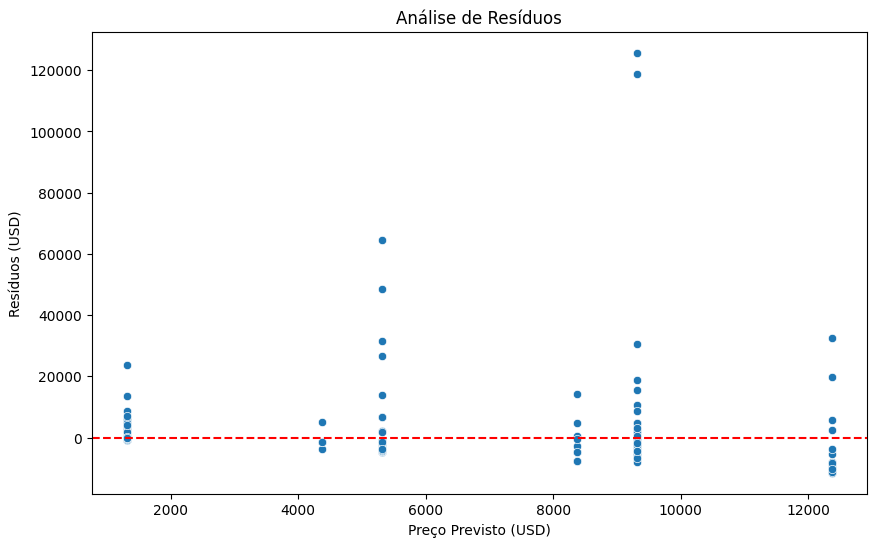

In [21]:
y_pred = model.predict(X_test)

print("\nMétricas de Performance:")
print(f"R²: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} USD")

# Gráfico de resíduos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Análise de Resíduos')
plt.xlabel('Preço Previsto (USD)')
plt.ylabel('Resíduos (USD)')
plt.show()